# Regressão Logística com Descida de Gradiente Regularizada

Este notebook foi criado para facilitar a realização dos experimentos do trabalho. Caso funcione bem, podemos adotar esta ferramenta também em trabalhos futuros.

**Conteúdo do notebook: **

- classe com a implementação da regressão logística com descida de gradiente regularizada;
- main com exemplo de utilização da classe;
- código para gerar os resultados e realizar os experimentos;
- avaliação dos resultados;

**Requisitos para executar este notebook: **
- ter os arquivos do repositório deste notebook na mesma pasta;
- ter numpy instalado (recomendável instalar toda pilha scipy);
- ter sklearn instalado caso queira comparar os resultados;

**Classe da regressão logística com descida de gradiente regularizada:**

A classe está implementada no arquivo regressao_logistica_regularizado.py que deve ser mantido no mesmo diretório deste notebook.

**exemplo de uso**

Neste exemplo é utilizada uma versão modificada do dataset iris do repositório UCI. Neste dataset uma classe foi excluída para que o dataset fosse transformado para ser utlizado em um problema de classificação binária.

In [1]:
from regressao_logistica_regularizado import RegularizedLogisticRegression
import csv
import numpy as np
from sklearn.metrics import accuracy_score
import time

#PREPARAÇÃO DO DATASET
X = []
Y = []
with open('iris_mod.csv', 'r') as f:
    reader = csv.reader(f)
    for r in reader:
        x = r[:-1]
        X.append([float(a) for a in x])
        Y.append(int(r[-1]))

X = np.array(X)
Y = np.array(Y)

indices = np.arange(X.shape[0])

np.random.shuffle(indices)

X = X[indices]
Y = Y[indices]

TRAIN_SIZE = int(.8 * X.shape[0])

X_train = X[:TRAIN_SIZE]
Y_train = Y[:TRAIN_SIZE]

X_test = X[TRAIN_SIZE:]
Y_test = Y[TRAIN_SIZE:]

#REGRESSÃO LOGÍSTICA
LR = RegularizedLogisticRegression()

epochs = 30

LR.fit(X_train,Y_train, epochs=epochs, learning_rate=0.08, Lambda=0.1, print_results=False)
print("train accuracy: " + str(LR.accuracy_score(X_train,Y_train)*100.0) + "%")

Y_predict = LR.predict(X_test)

print('test accuracy: ' + str(LR.accuracy_score(X_test,Y_test)*100.0) + "%")
#print accuracy_score(Y_test,Y_predict)	#sklearn accuracy

print('final loss: ' + str(LR.loss[-1]))


train accuracy: 100.0%
test accuracy: 100.0%
final loss: 0.173080957755


**Classe para plotar gráficos**

Abaixo está definida a classe utilizada para plotar gŕaficos.

Parâmetros do método plot_curve:
- X -> lista com os pontos do eixo x
- Y -> lista com os pontos do eixo y

In [2]:
import matplotlib.pyplot as plt

class Plot:
    def __init__(self):
        pass
    
    def plot_curve(self, X, Y, xlabel='', ylabel='', color='blue', linewidth=2, title='', grid=False):
        plt.plot(X, Y, color=color, linewidth=linewidth)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.grid(grid)

        plt.show()

**exemplo de execução: Loss x Iteração**

Abaixo está o código para plotar o gráfico da função de custo ao longo de cada iteração.

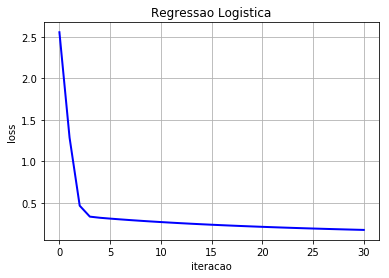

In [3]:
axis_x = range(epochs+1)

axis_y = LR.loss

plot = Plot()
plot.plot_curve(axis_x, axis_y, xlabel='iteracao', ylabel='loss', title='Regressao Logistica', grid=True)